# Motif Analysis

In [1]:
import sys
import snap
import numpy as np
import tqdm
from random import sample
sys.path.append('../src')
import enumerate_motifs
reload(enumerate_motifs)

<module 'enumerate_motifs' from '../src/enumerate_motifs.pyc'>

In [2]:
def gen_config_model_rewire(graph, iterations=10000):
    config_graph = graph
    clustering_coeffs = []

    edges = set([str(e.GetSrcNId())+'->'+str(e.GetDstNId()) for e in config_graph.Edges()])
    for i in tqdm.tqdm(range(iterations)):
        e1s, e2s = sample(edges, 2)
        e1 = [int(x) for x in e1s.split('->')]
        e2 = [int(x) for x in e2s.split('->')]

        if e1[0]!=e2[1] and e1[1]!=e2[0] and not config_graph.IsEdge(e1[0],e2[1]) and not config_graph.IsEdge(e2[0],e1[1]):
            config_graph.DelEdge(e1[0],e1[1])
            config_graph.DelEdge(e2[0],e2[1])
            edges.remove(e1s)
            edges.remove(e2s)            
            config_graph.AddEdge(e1[0],e2[1])
            config_graph.AddEdge(e2[0],e1[1])
            edges.add(str(e1[0])+'->'+str(e2[1]))
            edges.add(str(e2[0])+'->'+str(e1[1]))
            
        else:
            i = i-1
        
        
        if i%100==0:
            clustering_coeffs.append(snap.GetClustCf(config_graph))

    return config_graph, clustering_coeffs

def gen_config_model_reverse(graph, iterations=1000):
    config_graph = graph
    clustering_coeffs = []

    edges = set([str(e.GetSrcNId())+'->'+str(e.GetDstNId()) for e in config_graph.Edges()])
    for i in range(iterations):
        e1s = sample(edges, 1)[0]
        e1 = [int(x) for x in e1s.split('->')]
        #e2 = [int(x) for x in e2s.split('->')]

        config_graph.DelEdge(e1[0], e1[1])
        edges.remove(e1s)
        if not config_graph.IsEdge(e1[1], e1[0]):
            config_graph.AddEdge(e1[1], e1[0])
            edges.add(str(e1[1])+'->'+str(e1[0]))
        
        if i%100==0:
            clustering_coeffs.append(snap.GetClustCf(config_graph))

    return config_graph, clustering_coeffs

In [3]:
def load_graph(nm):
    if nm =='LS':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1)
    elif nm=='SW':
        return snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1)
    else:
        print('ERROR LOADING')
G_LS174t = load_graph('LS')
G_SW1222 = load_graph('SW')

In [4]:
mc3 = enumerate_motifs.MotifCounter(3)

In [5]:
G_LS_3motifs = mc3.count_motifs(G_LS174t)

100%|██████████| 16354/16354 [00:05<00:00, 2862.72it/s]


In [6]:
G_LS_3motifs

[5750, 23612, 0, 5604, 698, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
mc4 = enumerate_motifs.MotifCounter(4)

In [8]:
G_LS_4motifs = mc4.count_motifs(G_LS174t)

100%|██████████| 16354/16354 [01:29<00:00, 182.49it/s]


In [14]:
G_SW_3motifs = mc3.count_motifs(G_SW1222)

100%|██████████| 64239/64239 [00:21<00:00, 2999.30it/s]


In [15]:
G_SW_3motifs

[24046, 85782, 0, 24270, 3746, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
G_SW_4motifs = mc4.count_motifs(G_SW1222)

100%|██████████| 64239/64239 [05:45<00:00, 185.75it/s]


In [ ]:
G_SW_4motifs

In [39]:
%%capture
grid_config_motifs_LS_3motifs = np.zeros((10,13))
for i in range(10):
    G = load_graph("LS")
    G,_ = gen_config_model_rewire(G, iterations=2500)    
    grid_config_motifs_LS_3motifs[i,:] = mc3.count_motifs(G)

In [10]:
np.mean(grid_config_motifs_LS_3motifs, axis=0)

array([6.40720e+03, 2.42638e+04, 3.00000e-01, 6.26080e+03, 4.04000e+01,
       0.00000e+00, 7.00000e-01, 0.00000e+00, 1.10000e+00, 1.00000e-01,
       0.00000e+00, 0.00000e+00, 0.00000e+00])

In [11]:
zip(range(13), np.mean(grid_config_motifs_LS_3motifs, axis=0),G_LS_3motifs)

[(0, 6407.2, 5750),
 (1, 24263.8, 23612),
 (2, 0.3, 0),
 (3, 6260.8, 5604),
 (4, 40.4, 698),
 (5, 0.0, 0),
 (6, 0.7, 0),
 (7, 0.0, 0),
 (8, 1.1, 0),
 (9, 0.1, 0),
 (10, 0.0, 0),
 (11, 0.0, 0),
 (12, 0.0, 0)]

In [20]:
np.std(grid_config_motifs_LS_3motifs, axis=0)

array([ 9.02718118, 13.37348122,  2.94788059,  8.55803716,  7.6393717 ,
        0.        ,  2.18174242,  0.        ,  0.87177979,  0.        ,
        0.4       ,  0.        ,  0.        ])

In [43]:
%%capture
grid_config_motifs_LS_4motifs = np.zeros((10,199))
for i in range(10):
    G = load_graph("LS")
    G,_ = gen_config_model_rewire(G, iterations=2500)    
    grid_config_motifs_LS_4motifs[i,:] = mc4.count_motifs(G)



  2%|▏         | 334/16354 [00:21<01:35, 168.03it/s]

In [ ]:
grid_config_motifs_SW_4motifs = np.zeros((10,199))
for i in range(10):
    G = load_graph("SW")
    G,_ = gen_config_model_rewire(G, iterations=10000)    
    grid_config_motifs_SW_4motifs[i,:] = mc4.count_motifs(G)
    print(grid_config_motifs_SW_4motifs[i])

In [ ]:
grid_config_motifs_SW_4motifs

In [ ]:
zip(range(199), np.mean(grid_config_motifs_LS_4motifs, axis=0),G_LS_4motifs)

In [38]:
%%capture
grid_config_motifs_SW_3motifs = np.zeros((10,13))
for i in range(10):
    G = load_graph("SW")
    G,_ = gen_config_model_rewire(G, iterations=10000)    
    grid_config_motifs_SW_3motifs[i,:] = mc3.count_motifs(G)


 42%|████▏     | 4191/10000 [00:43<00:39, 147.60it/s]

In [17]:
zip(range(13), np.mean(grid_config_motifs_SW_3motifs, axis=0), G_SW_3motifs)

[(0, 26074.4, 24046),
 (1, 87808.7, 85782),
 (2, 0.3, 0),
 (3, 26298.1, 24270),
 (4, 1717.3, 3746),
 (5, 0.0, 0),
 (6, 0.6, 0),
 (7, 0.0, 0),
 (8, 0.1, 0),
 (9, 0.0, 0),
 (10, 0.0, 0),
 (11, 0.0, 0),
 (12, 0.0, 0)]

# Plots

In [18]:
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage,imread
from matplotlib.transforms import Bbox
from matplotlib.offsetbox import DrawingArea, OffsetImage,AnnotationBbox

TICKYPOS = -.6

In [40]:
# LS_3motifs
Z_LS_3motifs = (G_LS_3motifs - np.mean(grid_config_motifs_LS_3motifs, axis=0))/np.std(grid_config_motifs_LS_3motifs, axis=0)
Z_SW_3motifs = (G_SW_3motifs - np.mean(grid_config_motifs_SW_3motifs, axis=0))/np.std(grid_config_motifs_SW_3motifs, axis=0)
for i in range(13):
    if not np.isfinite(Z_LS_3motifs[i]):
        Z_LS_3motifs[i] = 0
    if not np.isfinite(Z_SW_3motifs[i]):
        Z_SW_3motifs[i] = 0

/Users/surag/Desktop/Stanford/Fall'18/CS224W/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  
/Users/surag/Desktop/Stanford/Fall'18/CS224W/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


[1, 0, 3, 4, 12, 11, 10, 9, 8, 7, 6, 5, 2]


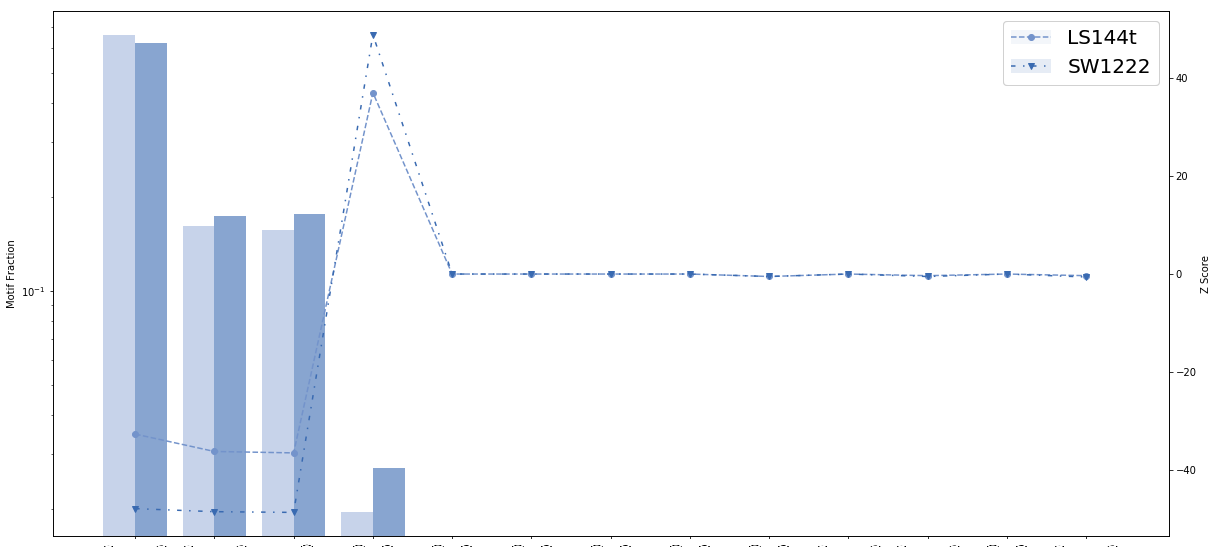

In [41]:
top_motifs = list(np.argsort(G_LS_3motifs)[::-1])
print(top_motifs)
#least_motifs = sample([i for i,x in enumerate(G_LS_4motifs) if x==0], 5)
topLS_3motif_counts = [G_LS_3motifs[i]/float(sum(G_LS_3motifs)) for i in top_motifs]
topSW_3motif_counts = [G_SW_3motifs[i]/float(sum(G_SW_3motifs)) for i in top_motifs]


fig, ax = plt.subplots(figsize=(20,10))
ax.bar([x-0.2 for x in range(13)], topLS_3motif_counts, color='#7393CB', alpha=0.4, width=0.4, label='LS144t')
ax.bar([x+0.2 for x in range(13)], topSW_3motif_counts, color='#396AB1', alpha=0.6, width=0.4, label='SW1222')
plt.yscale('log')
plt.xticks(range(13))
plt.ylabel('Motif Fraction')
ax.get_xaxis().set_ticklabels([])

ax2 = ax.twinx()
ax2.plot(range(13), [Z_LS_3motifs[i] for i in top_motifs], color='#7393CB', linestyle='--', marker='o', label='LS144t')
ax2.plot(range(13), [Z_SW_3motifs[i] for i in top_motifs], color='#396AB1', linestyle=(0, (3, 5, 1, 5)), marker='v', label='SW1222')
ax2.set_ylabel('Z Score')
for i in range(13):
    arr_img = plt.imread("../data/subgraphs/3/%d.png" % top_motifs[i], format='png')
    imagebox = OffsetImage(arr_img, zoom=0.4)
    imagebox.image.axes = ax
    
    ab = AnnotationBbox(imagebox, (i,0),
                        xybox=(0, -7),
                        xycoords=("data", "axes fraction"),
                        boxcoords="offset points",
                        box_alignment=(.5, 1),
                        bboxprops={"edgecolor" : "none"})
    
    ax.add_artist(ab)
    
plt.gcf().subplots_adjust(bottom=0.15)
ax.legend(prop={'size': 20})
ax2.legend(prop={'size': 20})
plt.savefig('lol.png', dpi=300)

In [44]:
# LS_4motifs

Z_LS_4motifs = (G_LS_4motifs - np.mean(grid_config_motifs_LS_4motifs, axis=0))/np.std(grid_config_motifs_LS_4motifs, axis=0)
Z_SW_4motifs = (G_SW_4motifs - np.mean(grid_config_motifs_SW_4motifs, axis=0))/np.std(grid_config_motifs_SW_4motifs, axis=0)
for i in range(13):
    if not np.isfinite(Z_LS_4motifs[i]):
        Z_LS_4motifs[i] = 0
    if not np.isfinite(Z_SW_4motifs[i]):
        Z_SW_4motifs[i] = 0

/Users/surag/Desktop/Stanford/Fall'18/CS224W/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/surag/Desktop/Stanford/Fall'18/CS224W/env/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


[15, 3, 24, 4, 1, 12, 19, 25, 35, 0, 58, 48, 7, 30, 5]


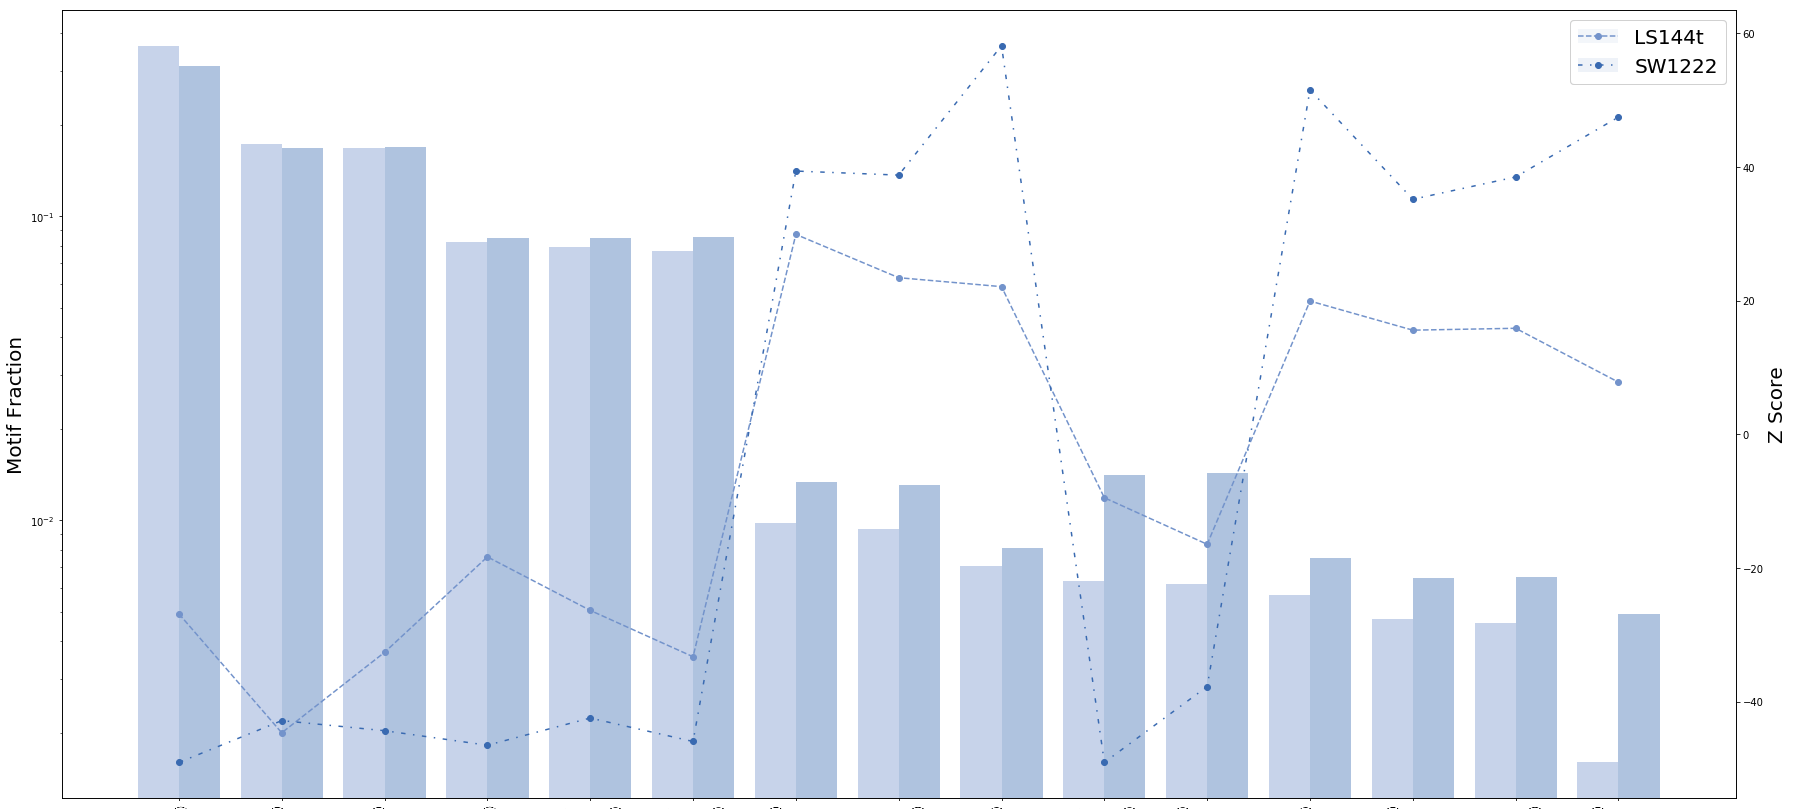

In [51]:
top_motifs = list(np.argsort(G_LS_4motifs)[-15:][::-1])
print(top_motifs)
#least_motifs = sample([i for i,x in enumerate(G_LS_4motifs) if x==0], 5)
topLS_motif_counts = [G_LS_4motifs[i]/float(sum(G_LS_4motifs)) for i in top_motifs]
topSW_motif_counts = [G_SW_4motifs[i]/float(sum(G_SW_4motifs)) for i in top_motifs]
#print(main_motifs)

fig, ax = plt.subplots(figsize=(30,15))
plt.bar([x-0.2 for x in range(len(top_motifs))], topLS_motif_counts, color='#7393CB', alpha=0.4, width=0.4, label='LS144t')
plt.bar([x+0.2 for x in range(len(top_motifs))], topSW_motif_counts, color='#396AB1', alpha=0.4, width=0.4, label='SW1222')
ax = plt.gca()
plt.yscale('log')
plt.xticks(range(len(top_motifs)))
plt.ylabel('Motif Fraction', fontsize=20)
ax.get_xaxis().set_ticklabels([])

ax2 = ax.twinx()
ax2.plot(range(len(top_motifs)), [Z_LS_4motifs[i] for i in top_motifs], color='#7393CB', linestyle='--', marker='o', label='LS144t')
ax2.plot(range(len(top_motifs)), [Z_SW_4motifs[i] for i in top_motifs], color='#396AB1', linestyle=(0, (3, 5, 1, 5)), marker='o', label='SW1222')
ax2.set_ylabel('Z Score', fontsize=20)

 
for j, i in enumerate(top_motifs):
    arr_img = plt.imread("../data/subgraphs/4/%d.png" % i, format='png')
    imagebox = OffsetImage(arr_img, zoom=0.4)
    imagebox.image.axes = ax
    
    ab = AnnotationBbox(imagebox, (j,0),
                        xybox=(0, -7),
                        xycoords=("data", "axes fraction"),
                        boxcoords="offset points",
                        box_alignment=(.5, 1),
                        bboxprops={"edgecolor" : "none"})
    
    ax.add_artist(ab)
plt.gcf().subplots_adjust(bottom=0.15)
ax.legend(prop={'size': 20})
ax2.legend(prop={'size': 20})
plt.savefig('lol4.png', dpi=300)